# MNIST Softmax Classifier

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from utils import show_model_metrics

### Import MNIST Data

In [2]:
# Define constants
TRAINDATA_FNAME = 'data/mnist_traindata.hdf5'  # Training data file
TESTDATA_FNAME = 'data/mnist_testdata.hdf5'  # Test data file

In [3]:
# Read training data from file
with h5py.File(TRAINDATA_FNAME, 'r') as data:
    xdata_train = data['xdata'][:]
    ydata_train = data['ydata'][:]

# Read test data from file
with h5py.File(TESTDATA_FNAME, 'r') as data:
    xdata_test = data['xdata'][:]
    ydata_test = data['ydata'][:]

### Metrics Class

In [4]:
# Softmax function
def softmax(x):
    exp = np.exp(x)
    return exp / np.sum(exp, axis=0)

# Convert y(i) one-hot encoding to y = {0, 1,..., K - 1}
def encode(y):
    return np.where(y == 1)[1]

# Loss function
def compute_loss(x, y, w):
    return (-1/len(x)) * np.sum(y.T * np.log(softmax(w @ x.T)))

# Classify each element
def classify(x, w):
    return np.argmax([[xi @ w[l] for l in range(0, len(w))] for xi in x], axis=1)

# Update weights
def update_weights(x, y, w, step):
    dldw = (-1/len(x)) * ((y.T - softmax(w @ x.T)) @ x)  # Compute log-loss gradient
    w = w - step * dldw  # Update weights
    return w

In [5]:
# Class to store metric data and iteratively update data
class Metrics:

    def __init__(self, xtrain, ytrain, xtest, ytest):
        self.xtrain = xtrain
        self.ytrain = ytrain
        self.xtest = xtest
        self.ytest = ytest
        self.loss_train = []  # Loss on training set
        self.loss_test = []  # Loss on test set
        self.accuracy_train = []  # Accuracy on training set
        self.accuracy_test = []  # Accuracy on test set

    def update(self, w):
        # Compute loss on training and test data
        self.loss_train.append(compute_loss(self.xtrain, self.ytrain, w))
        self.loss_test.append(compute_loss(self.xtest, self.ytest, w))

        # Compute accuracy on training and test data
        self.accuracy_train.append(np.sum(encode(self.ytrain) == classify(self.xtrain, w)) / len(self.xtrain) * 100)
        self.accuracy_test.append(np.sum(encode(self.ytest) == classify(self.xtest, w)) / len(self.xtest) * 100)
        return

### Model Implementation

In [6]:
# Create and train softmax regression model
def model(x, y, xtest, ytest, bsize, step, epochs):
    N = x.shape[0]  # Number of training samples
    L = x.shape[1]  # Number of input features
    K = y.shape[1]  # Number of classes

    # Initialize training parameters
    w = np.zeros((K, L))  # Weights
    metrics = Metrics(x, y, xtest, ytest)  # Training metrics

    # Train weights
    for epoch in range(0, epochs):                
        # Perform optimization step
        for i in range(0, N // bsize):
            xbatch = x[i * bsize:(i + 1) * bsize]
            ybatch = y[i * bsize:(i + 1) * bsize]
            w = update_weights(xbatch, ybatch, w, step)

            if (((i + 1) * bsize) % 10000 == 0):
                metrics.update(w)

        # Shuffle data
        if (N // bsize > 1):
            shuffle = np.random.permutation(N)
            x = x[shuffle]
            y = y[shuffle]

        print('Epoch {} | Train Loss = {:.4f} | Test Accuracy = {:.2f}%'
            .format(epoch + 1, metrics.loss_train[-1], metrics.accuracy_test[-1]))
    
    return w, metrics

### Training

#### Model 1
- Mini-batch size = 1
- Learning rate = 0.1
- Epochs = 10

In [7]:
# Train model
w1, metrics1 = model(xdata_train, ydata_train, xdata_test, ydata_test, 1, 0.1, 10)

Epoch 1 | Train Loss = 0.8561 | Test Accuracy = 87.73%
Epoch 2 | Train Loss = 0.8361 | Test Accuracy = 87.69%
Epoch 3 | Train Loss = 0.7039 | Test Accuracy = 89.70%
Epoch 4 | Train Loss = 0.8476 | Test Accuracy = 87.80%
Epoch 5 | Train Loss = 0.8921 | Test Accuracy = 87.63%
Epoch 6 | Train Loss = 0.7273 | Test Accuracy = 89.45%
Epoch 7 | Train Loss = 1.1672 | Test Accuracy = 84.03%
Epoch 8 | Train Loss = 0.7626 | Test Accuracy = 89.10%
Epoch 9 | Train Loss = 0.7851 | Test Accuracy = 89.67%
Epoch 10 | Train Loss = 0.8069 | Test Accuracy = 89.40%


Model 1 Metrics:
Train Loss: 0.80686
Test Loss : 0.94449
Train Accuracy: 89.94 %
Test Accuracy : 89.40 %


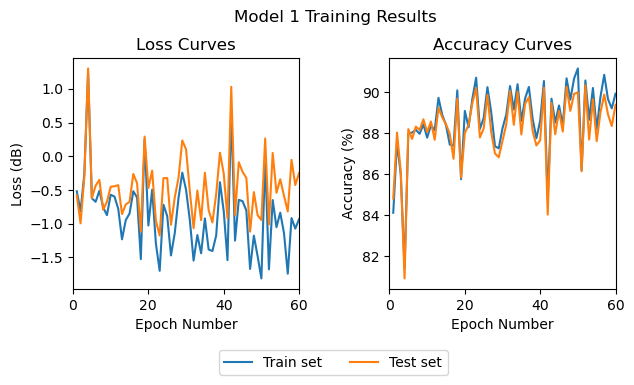

In [8]:
# Show final model metrics and training curves
show_model_metrics(metrics1, 'Model 1')

#### Model 2
- Mini-batch size = 100
- Learning rate = 0.1
- Epochs = 10

In [9]:
# Train model
w2, metrics2 = model(xdata_train, ydata_train, xdata_test, ydata_test, 100, 0.1, 10)

Epoch 1 | Train Loss = 0.3862 | Test Accuracy = 90.04%
Epoch 2 | Train Loss = 0.3434 | Test Accuracy = 91.03%
Epoch 3 | Train Loss = 0.3263 | Test Accuracy = 91.29%
Epoch 4 | Train Loss = 0.3151 | Test Accuracy = 91.62%
Epoch 5 | Train Loss = 0.3070 | Test Accuracy = 91.78%
Epoch 6 | Train Loss = 0.3011 | Test Accuracy = 91.85%
Epoch 7 | Train Loss = 0.2964 | Test Accuracy = 91.94%
Epoch 8 | Train Loss = 0.2944 | Test Accuracy = 91.97%
Epoch 9 | Train Loss = 0.2904 | Test Accuracy = 92.04%
Epoch 10 | Train Loss = 0.2900 | Test Accuracy = 92.09%


Model 2 Metrics:
Train Loss: 0.28996
Test Loss : 0.28666
Train Accuracy: 91.92 %
Test Accuracy : 92.09 %


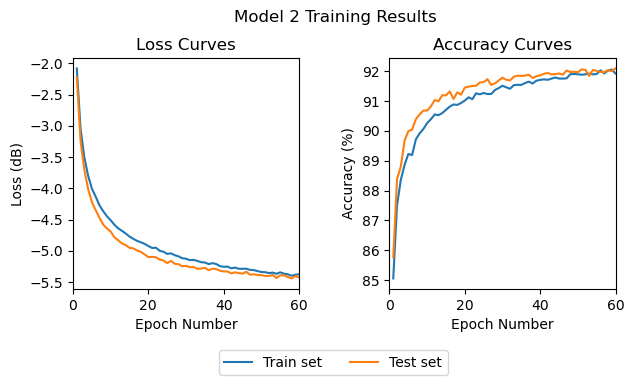

In [10]:
# Show final model metrics and training curves
show_model_metrics(metrics2, 'Model 2')

#### Model 3
- Mini-batch size = 60000
- Learning rate = 0.1
- Epochs = 10

In [16]:
# Train model
w3, metrics3 = model(xdata_train, ydata_train, xdata_test, ydata_test, 10000, 0.1, 30)

Epoch 1 | Train Loss = 1.7820 | Test Accuracy = 76.23%
Epoch 2 | Train Loss = 1.4536 | Test Accuracy = 79.56%
Epoch 3 | Train Loss = 1.2413 | Test Accuracy = 81.43%
Epoch 4 | Train Loss = 1.0974 | Test Accuracy = 82.46%
Epoch 5 | Train Loss = 0.9947 | Test Accuracy = 83.31%
Epoch 6 | Train Loss = 0.9181 | Test Accuracy = 83.78%
Epoch 7 | Train Loss = 0.8587 | Test Accuracy = 84.25%
Epoch 8 | Train Loss = 0.8113 | Test Accuracy = 84.86%
Epoch 9 | Train Loss = 0.7725 | Test Accuracy = 85.29%
Epoch 10 | Train Loss = 0.7401 | Test Accuracy = 85.66%
Epoch 11 | Train Loss = 0.7126 | Test Accuracy = 85.97%
Epoch 12 | Train Loss = 0.6889 | Test Accuracy = 86.21%
Epoch 13 | Train Loss = 0.6682 | Test Accuracy = 86.40%
Epoch 14 | Train Loss = 0.6501 | Test Accuracy = 86.58%
Epoch 15 | Train Loss = 0.6339 | Test Accuracy = 86.76%
Epoch 16 | Train Loss = 0.6195 | Test Accuracy = 86.88%
Epoch 17 | Train Loss = 0.6065 | Test Accuracy = 87.13%
Epoch 18 | Train Loss = 0.5946 | Test Accuracy = 87.21%
E

Model 3 Metrics:
Train Loss: 0.50665
Test Loss : 0.48454
Train Accuracy: 87.41 %
Test Accuracy : 88.20 %


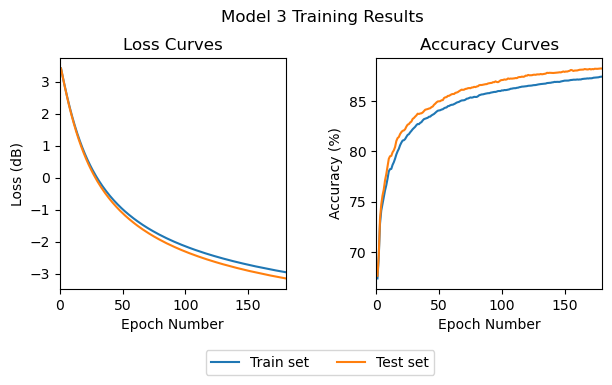

In [17]:
# Show final model metrics and training curves
show_model_metrics(metrics3, 'Model 3')